### Análisis Exploratorio de Datos (EDA)

En esta parte del análisis exploratorio de datos, nos hemos puesto un reto: Descubrir "Cuál es la característica que han tenido mayor impacto en el precio de un automovil" para responder esta pregunta debemos de utilizar alguna técnica útil de análisis de datos exploratorios. you have to learn about:

1. Estadística Descriptiva.
2. Group By
3. ANOVA: Esto concierne al análisis de la varianza, es un método estadístico en el que la variación de un conjunto de observaciones se divide en distintos componentes.
4. Correlación: La correlación entre distintas variables.
5. Correlación estadística. [Correlación Pearson] y mapas de calor

 

In [48]:
import pandas as pd
csv_path = 'C:\\Users\ilche_st130to\Downloads\Jupyter\datos.csv'
df= pd.read_csv(csv_path)

df.head()

,Nombre,Edad,Sueldo,Universidad
0,mirian,19,1022,No
1,karla,19,1155,No
2,smail,22,1600,No
3,dario,20,2000,Si
4,marcel,21,2200,No


Aquí lo que vamos hacer es utilizar un función llamada df.describe() que nos permitirá calculr todas las variables que tenemos por ejemplo "Edad" y "Sueldo"

1. N° De filas
2. Promedio
3. Desviación Estandar
4. Los cuartiles
5. El valor máximo

Cabe resaltar que los valores nulos o NaN se saltan para el análisis


In [50]:
df.describe()

,Edad,Sueldo
count,14.000000,14.000000
mean,22.357143,2332.214286
std,2.273836,689.355125
min,19.000000,1022.000000
25%,21.000000,2050.000000
50%,22.000000,2395.000000
75%,24.500000,2956.000000
max,26.000000,3200.000000


In [51]:
df["Edad"].value_counts()
   

25    3
22    3
23    2
21    2
19    2
26    1
20    1
Name: Edad, dtype: int64

En esta gráfica podemos ver que los suelos de las edades

"19 | 20 | 21 | 23 | 25 | 26" = Son muy marcadas en el mercado, 
pero al llegar a la edad de 22 años puedes estar en un lindero de 1500 - 2500 soles de sueldo



<AxesSubplot:xlabel='Edad', ylabel='Sueldo'>

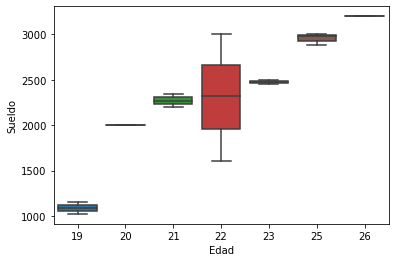

In [52]:
import seaborn as sns

sns.boxplot(x="Edad",y="Sueldo", data=df)

Aqui queremos predecir los sueldos de las personas según su edad, para esto siempre el valor a predecir va a estar en el eje x Y Horizontal y en el eje Y va a estar la variable a analizar, ejemplo

In [36]:
import matplotlib.pyplot as plt



Text(0, 0.5, 'Edad')

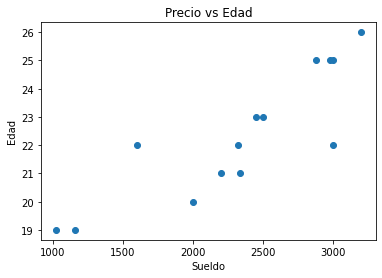

In [53]:
x= df["Sueldo"]
y= df["Edad"]
plt.scatter(x,y)
plt.title("Precio vs Edad")
plt.xlabel("Sueldo")
plt.ylabel("Edad")



Aquí podemos ver que las personas entre 21 - 23 años ganan al rededor de 2000 - 2500  Soles,
en conclusión podemos observar que existe una relacion lineal entre estas dos variables


# GROUP BY IN PYTHON
Estamos agrupando para ver si es que existe alguna relación entre la variable de Universidad y edad con respecto al sueldo en el lado izquierdo podemos encontrar un promedio de los sueldo según la edad y la Universidad

In [56]:
df_test = df[['Sueldo','Edad','Universidad']]
df_group = df_test.groupby(['Universidad','Edad'], as_index=False ).mean()
df_group

,Universidad,Edad,Sueldo
0,No,19,1088.5
1,No,21,2200.0
2,No,22,1600.0
3,No,23,2450.0
4,No,25,2884.0
5,Si,20,2000.0
6,Si,21,2340.0
7,Si,22,2660.0
8,Si,23,2500.0
9,Si,25,2990.0


Estos datos resultan "No intuitivos" para el análisis si se tratara de millones de datos, pero para hacer algo más dinámico utilizaremos una función llamada Pivot

In [60]:
df_pivot = df_group.pivot(index = 'Edad', columns ='Universidad')
df_pivot

Sueldo        
Universidad      No      Si
Edad                       
19           1088.5     NaN
20              NaN  2000.0
21           2200.0  2340.0
22           1600.0  2660.0
23           2450.0  2500.0
25           2884.0  2990.0
26              NaN  3200.0

La otra posible herramienta para poder visualizar tus datos de forma agrupada puede ser:

HeatMap o mapa de calor 


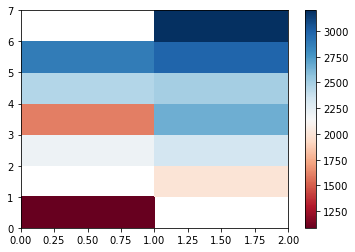

In [66]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

Algo muy importante para hacer un análisis es la correlación: "Si una variable a lo largo del tiempo cambia, esta cómo afecta a la otra variable", veremos la correlación entre el sueldo y la edad

(0.0, 3667.839188796683)

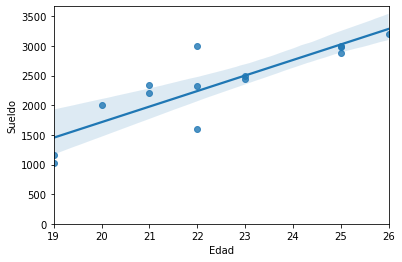

In [69]:
sns.regplot(x="Edad", y="Sueldo", data = df)
plt.ylim(0,)

Podemo susar Seaborn.regplor para crear gráfico de disperción

(0.0, 26.474157454162984)

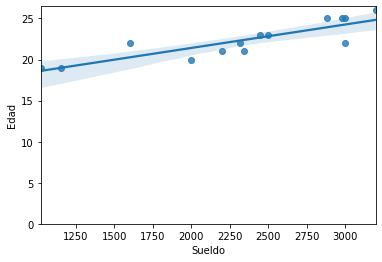

In [73]:
sns.regplot(x="Sueldo", y="Edad", data = df)
plt.ylim(0,)

Cuando la pendiente no es muy pronunciada decimos que es una correlación debil,
Hay 3 tipos de correlación:
1. Correlación Positiva (Pendiente + )
2. Correlación Negativa (Pendiente - )
3. Correlación Debil (Pendiente no empinada y muchos valores atípícos)


Otra forma de medir la correlación, es con la técnica de pearson correlation, esto te dará 2 valores, el coeficiente de correlación y el valor P,  Cómo nosotros podemos interpretarlo

1. Coeficiente de correlación: valor entre -1 y 1 donde el valor que se acerque más a 1 significa mayor correlación

   1.1 Cercano a 1: Correlación Positiva
   
   1.2 Cecano a -1: Correlación Negativa
   
   1.3 Valor = 0 --> implica que no hay correlación. 
   
2. Valor P: 


P. Value < 0.001 --> Nos dá una fuerte certeza sobre el coeficiente de correlación que hemos calculado 

P. Value 0.001 - 0.05 --> Nos dá una certeza moderada

P. Value 0.05 - 0.1 --> Nos dá una certeza debil 

P. Value > 0.1 --> No nos dá una certeza de correlación


EJEMPLO DE IMAGENES DE CORRELACIÓN:

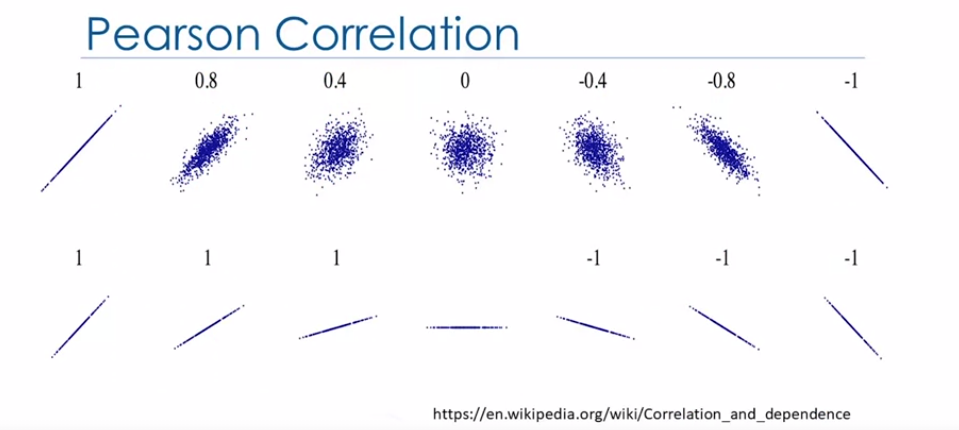

In [77]:
from scipy import stats


In [82]:
pearson_coef, p_value= stats.pearsonr(df['Sueldo'], df['Edad'])
 
pearson_coef
 

0.864195728531631

In [83]:
p_value

6.716008034093435e-05

pearson_coef = 0.864195728531631 | Significa que si existe una correlación entre Sueldo y edad [Correlación Positiva]

p_value = 6.716008034093435e-05 | Nos dá una fuerte certeza sobre el coeficiente de correlación que hemos calculado 

# ANOVA (Analysis of variance)

ANOVA es utilizada para encontrar las diferentes correlaciones entre diferentes grupos de una variable categórica, esto va a devolver 2 variables:

1. F-Test :Esto calcula la variación entre la media de los grupos sobre la variación en cada uno de los grupos de muestra 

2. P-VALUE:


In [97]:
df_anova =  df[["Universidad", "Sueldo"]]
grouped_anova= df_anova.groupby (["Universidad"])
anova_results_l = stats.f_oneway(grouped_anova.get_group("Si")["Sueldo"], grouped_anova.get_group("No")["Sueldo"])
 
anova_results_l
 

F_onewayResult(statistic=6.172953736991295, pvalue=0.02871797407678465)

Significa que si hay distancia entre las personas que asisten a la universidad y las que no con respecta al sueldo  que perciben, pero esto debe de compararse entre otros, para saber si hay correlación o no deberíamos tener entre 3 o 5 anova_results_l  para tomar una desición

In [101]:
 df['Edad'].value_counts().to_frame()

,Edad
25,3
22,3
23,2
21,2
19,2
26,1
20,1


<h2 id="correlation_causation">1. Correlación y causalidad
</h2>


<p><b>Correlación:</b> una medida del grado de interdependencia entre variables.</p>

<p><b>Causalidad:</b> la relación entre causa y efecto entre dos variables.</p>

<p>Es importante saber la diferencia entre estos dos y que la correlación no implica causalidad. Determinar la correlación es mucho más simple que la causalidad determinante ya que la causalidad puede requerir experimentación independiente.</p>


<p3>Correlación de Pearson</p3>

<p>La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.</p>
<p>El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:</p>
<ul>
    <li><b>1</b>: correlación lineal positiva total.</li>
    <li><b>0</b>: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.</li>
    <li><b>-1</b>: correlación lineal negativa total.</li>
</ul>

<b>Valor p</b>: 

<p>¿Qué es este valor P? El valor P es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que estamos 95% seguros de que la correlación entre las variables es significativa.</p>

Por convención, cuando el

<ul>
    <li>El valor p es $<$ 0.001 decimos que hay pruebas sólidas de que la correlación es significativa.</li>
    <li>el valor p es $<$0.05: existe evidencia moderada de que la correlación es significativa.
</li>
    <li>el valor p es $<$0.1: existe evidencia débil de que la correlación es significativa.
</li>
    <li>el valor p es $>$ 0.1: no hay evidencia de que la correlación sea significativa.
</li>
</ul>

                                                  Email: U201512507@upc.edu.pe
                                                  
                                                  